In [2]:
import pandas as pd
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
road = pd.read_csv('Road.csv')
print(road.info())

<ipython-input-2-a82694a7af92>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

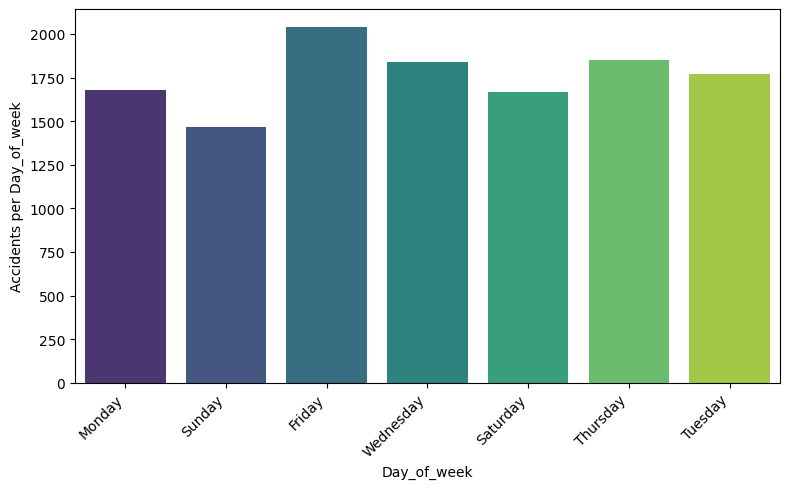

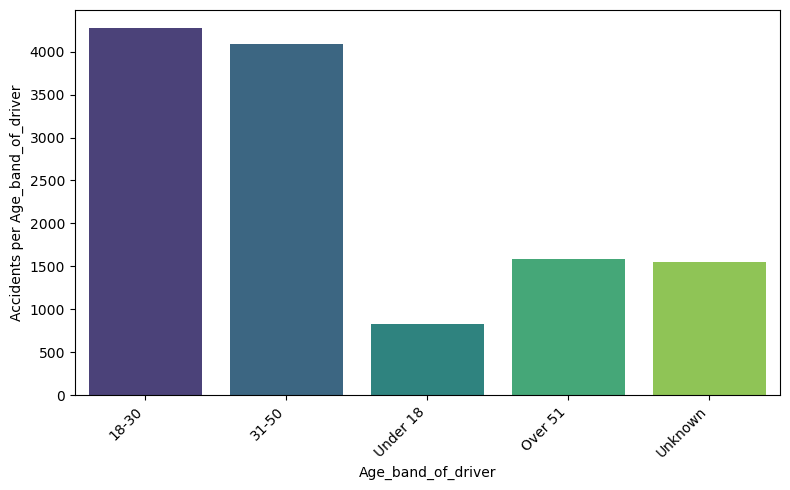

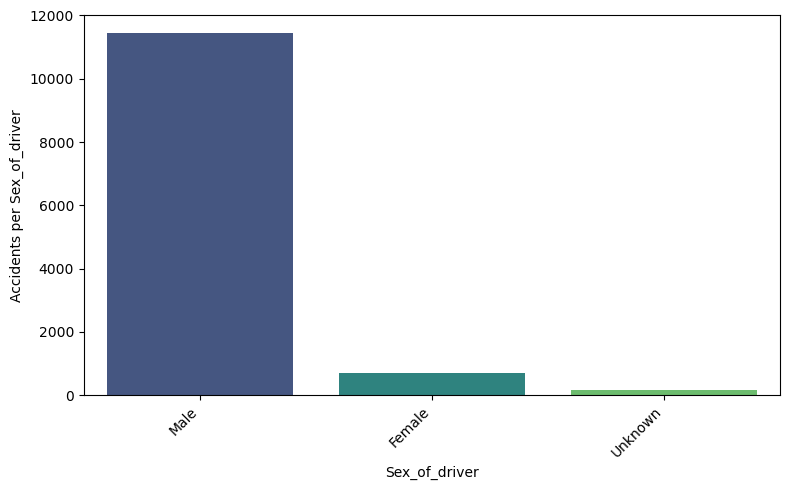

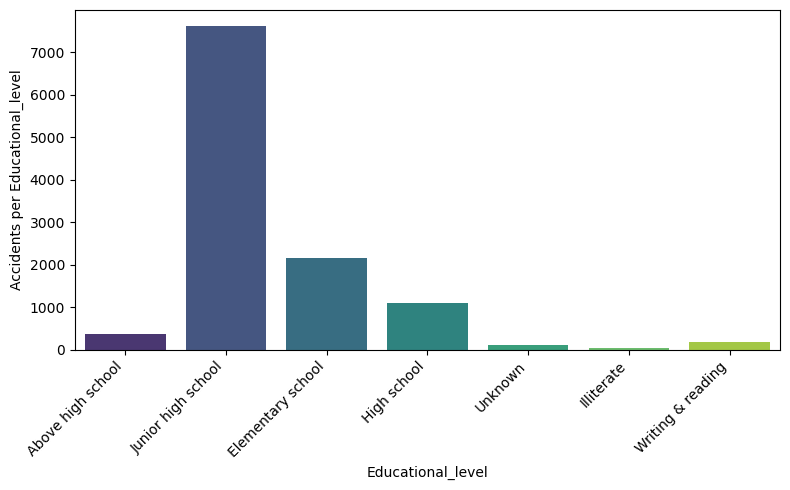

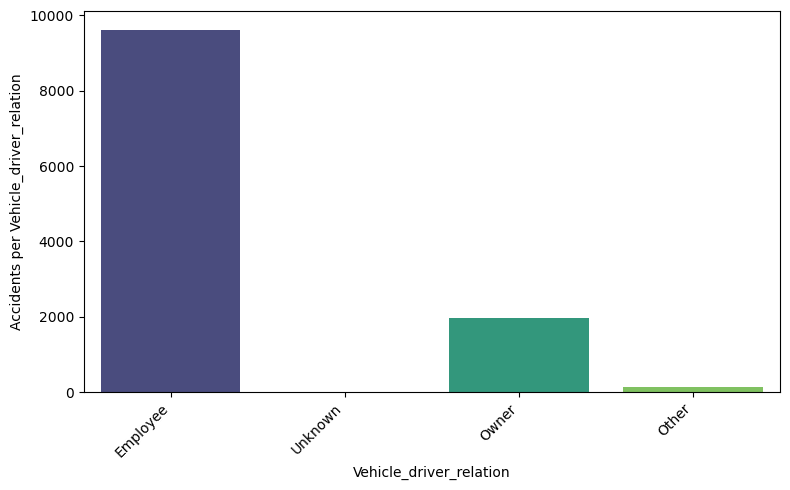

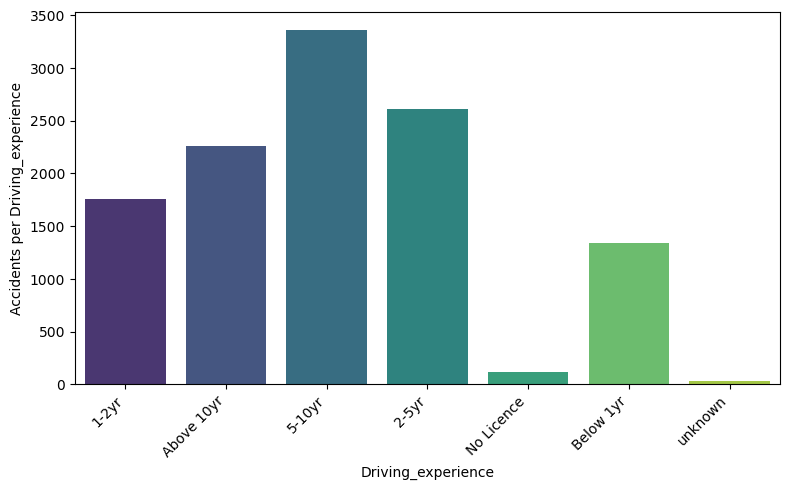

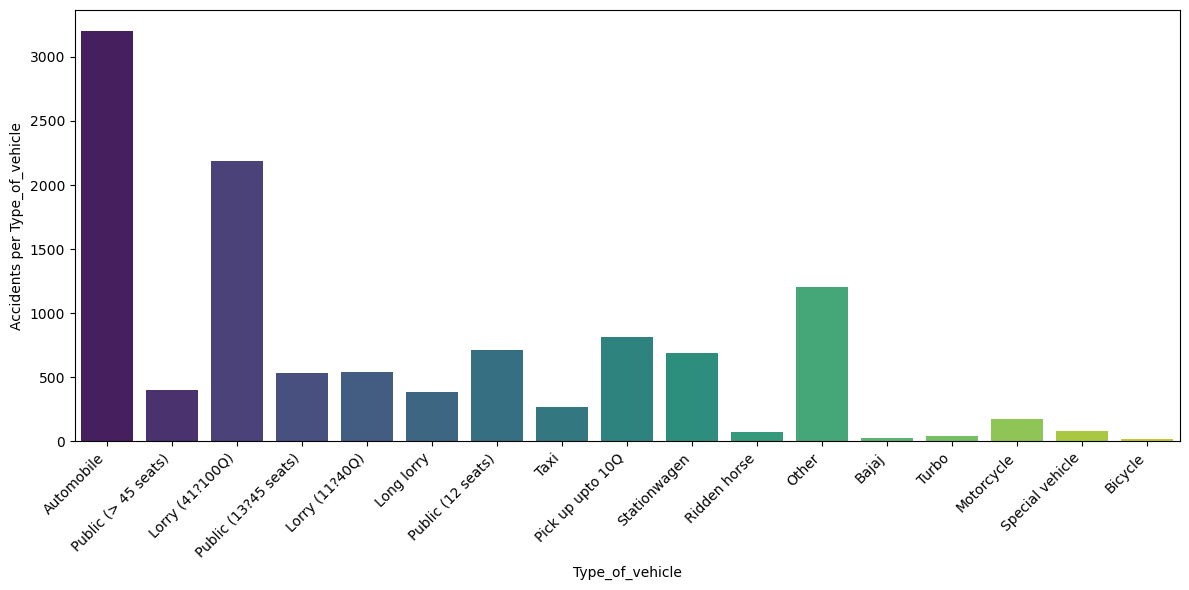

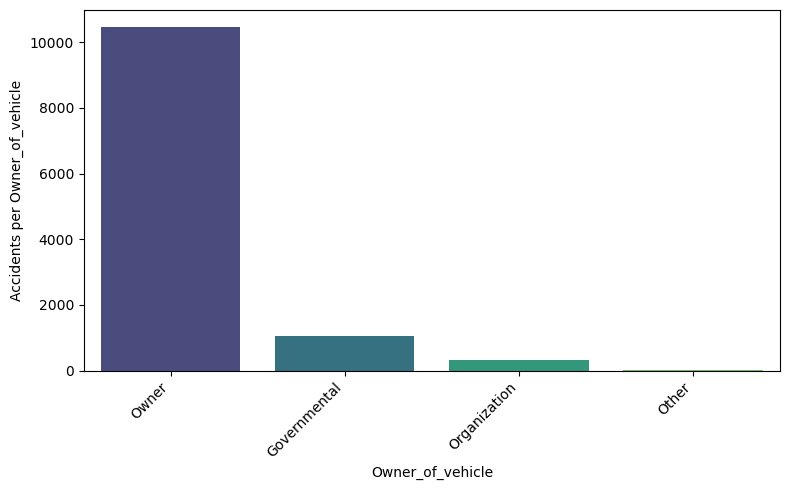

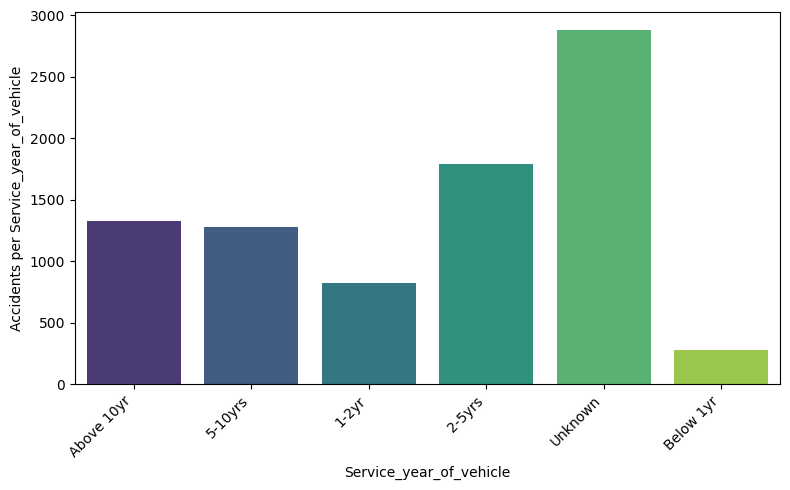

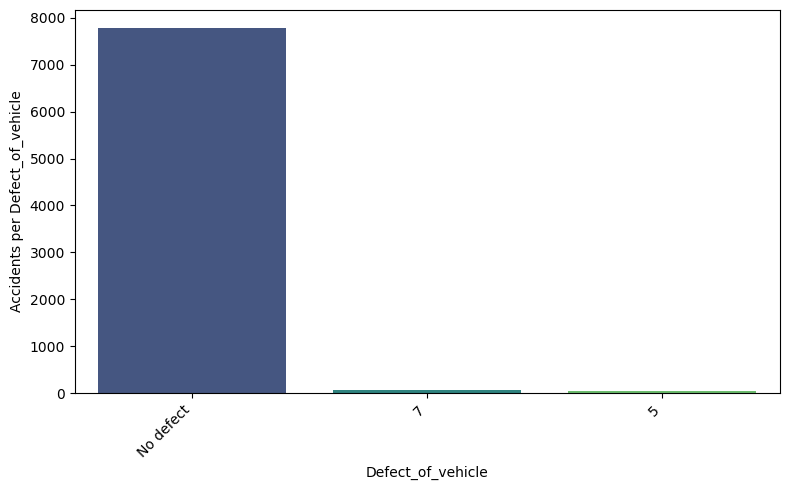

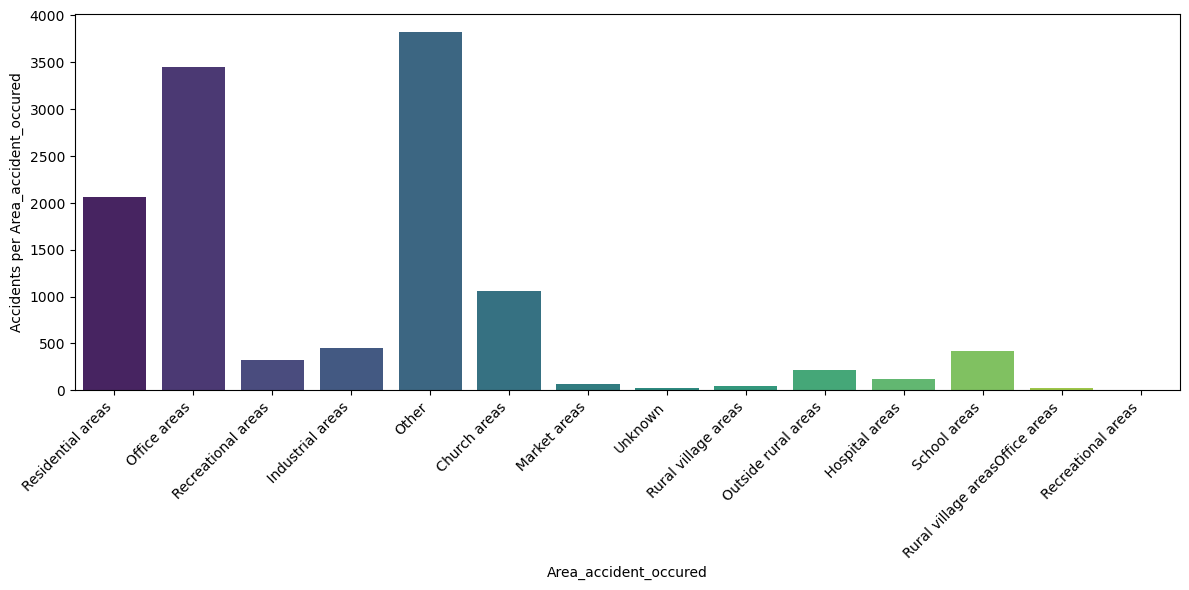

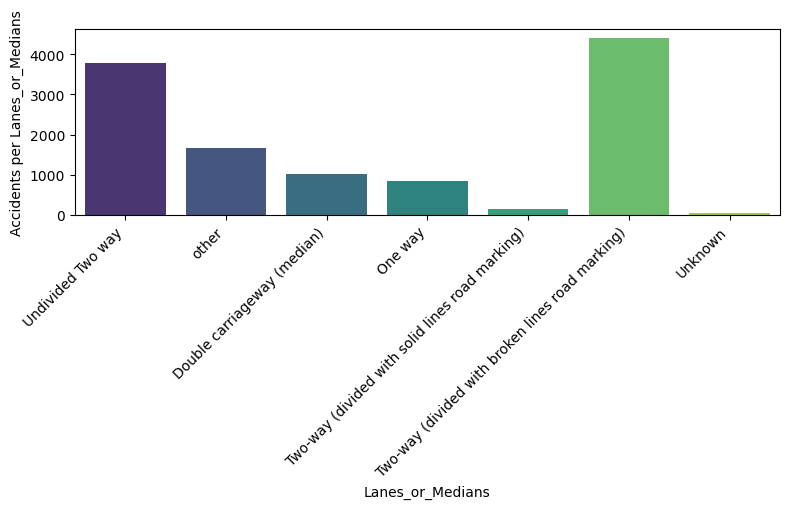

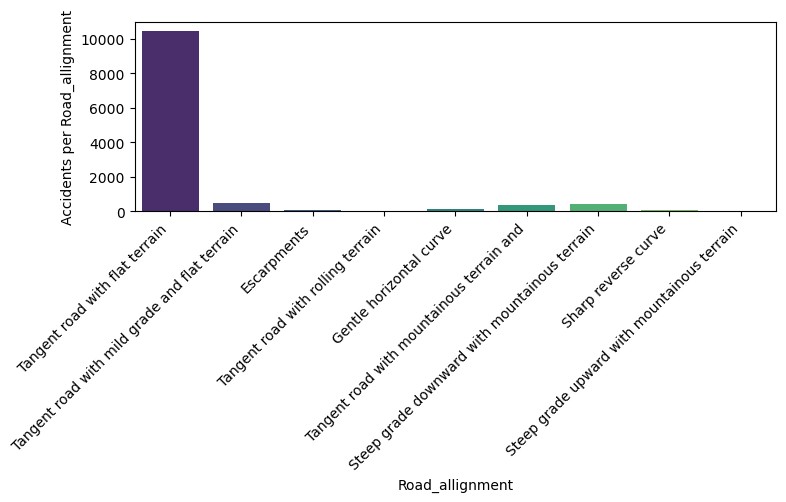

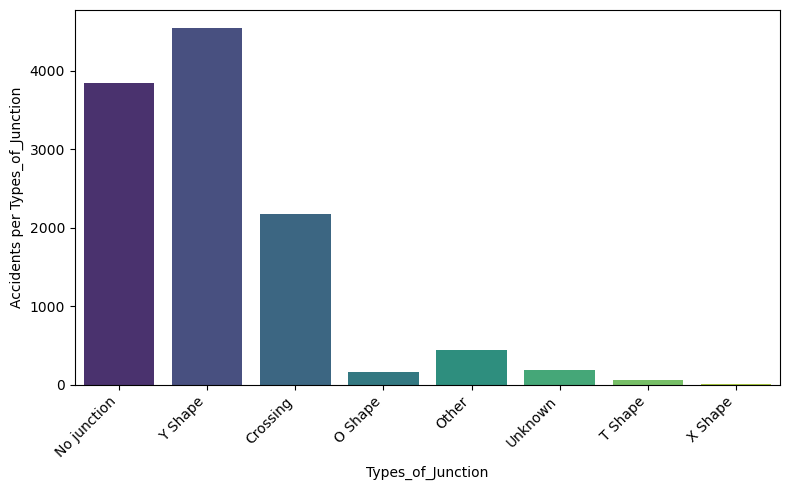

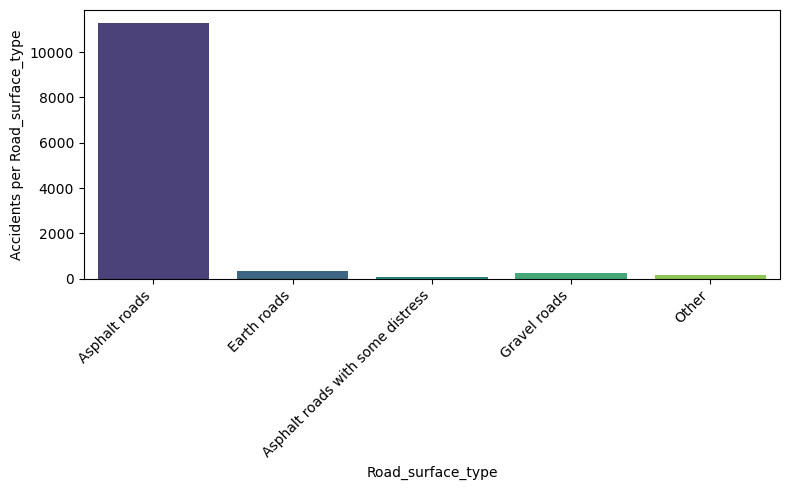

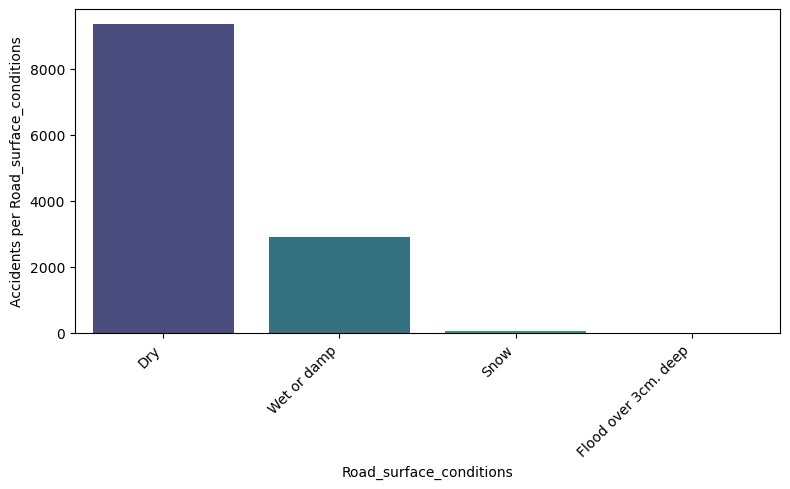

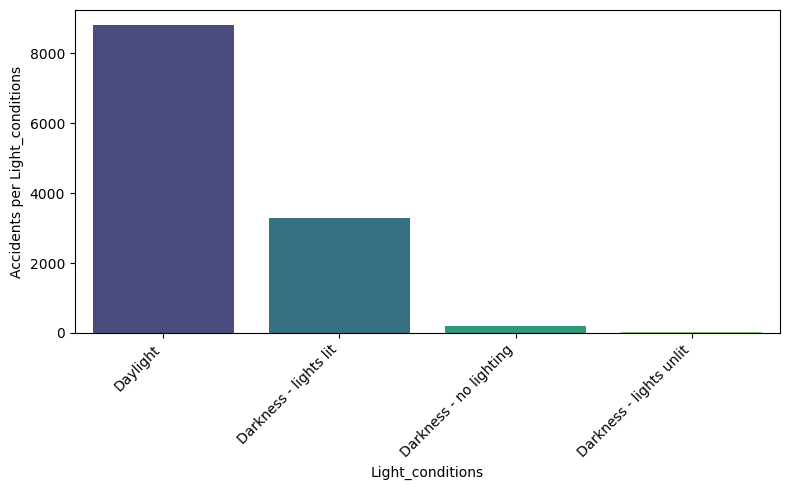

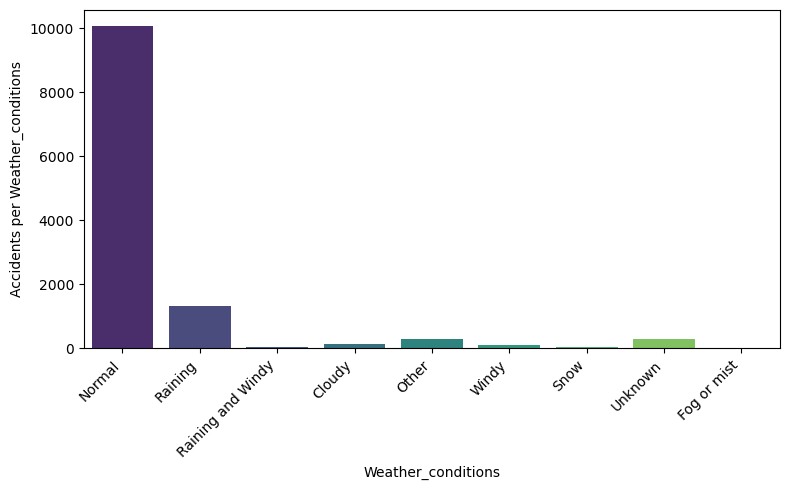

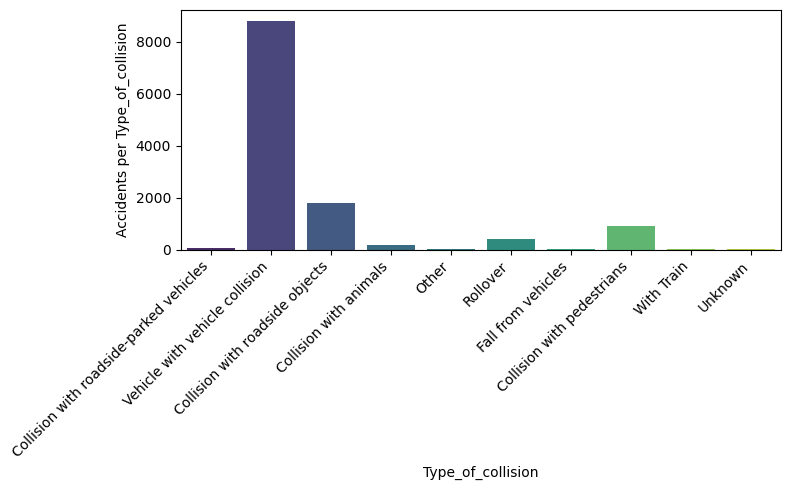

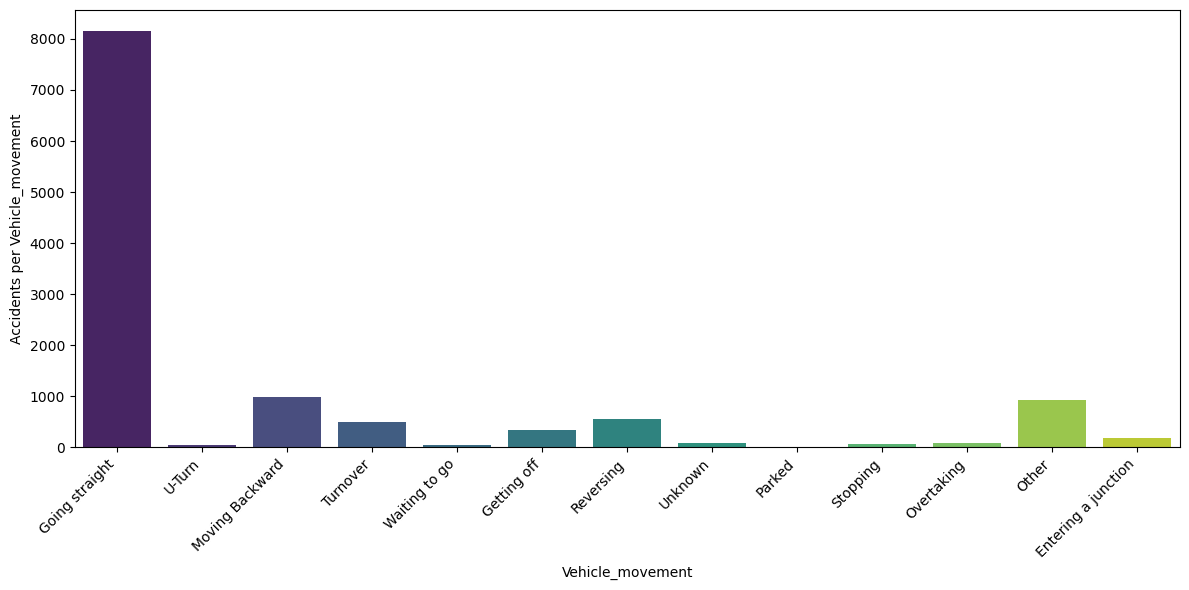

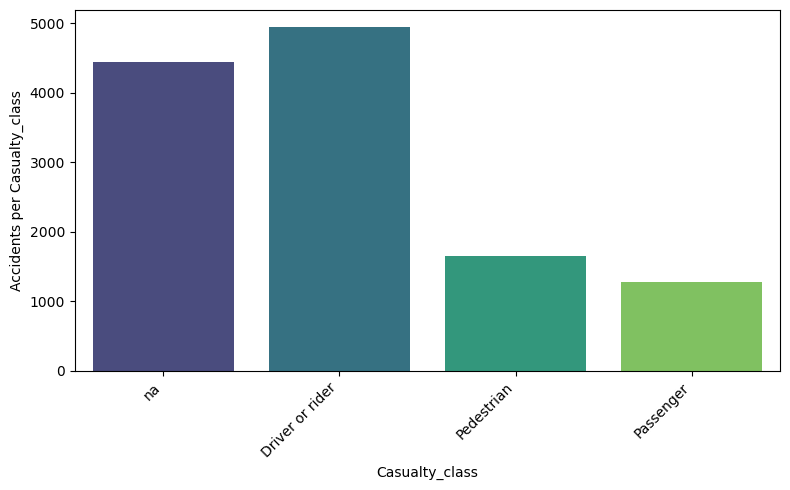

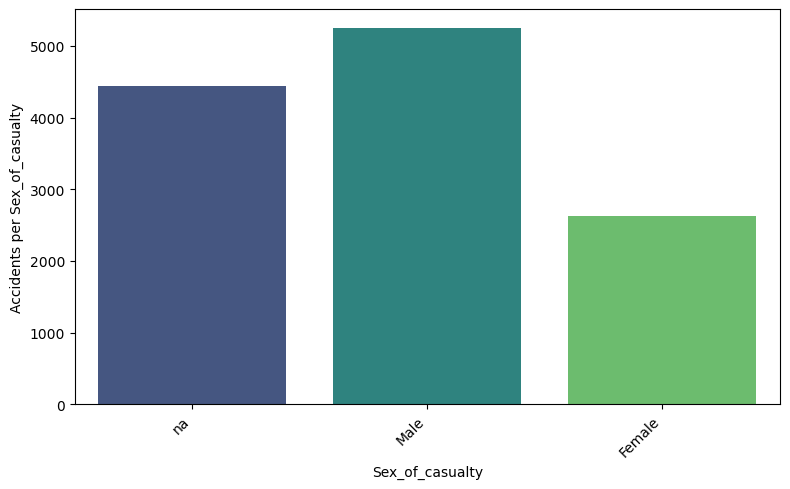

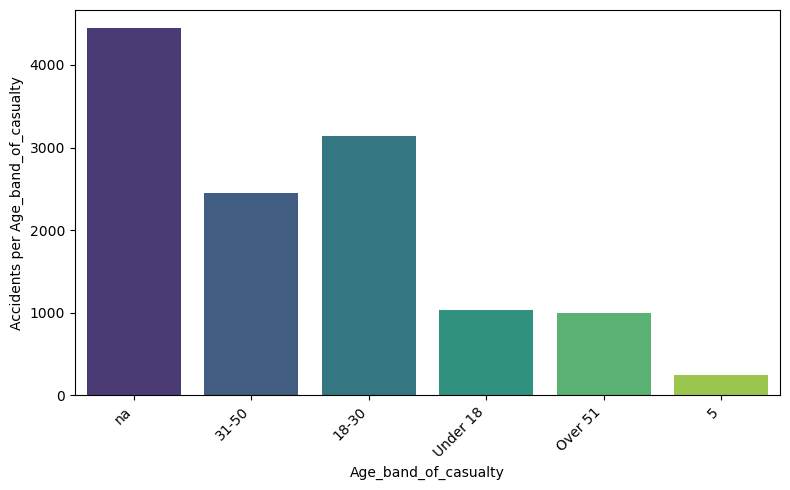

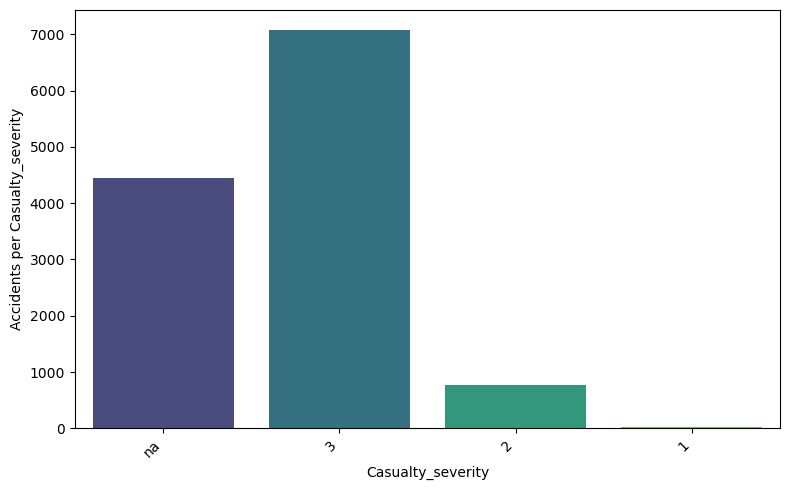

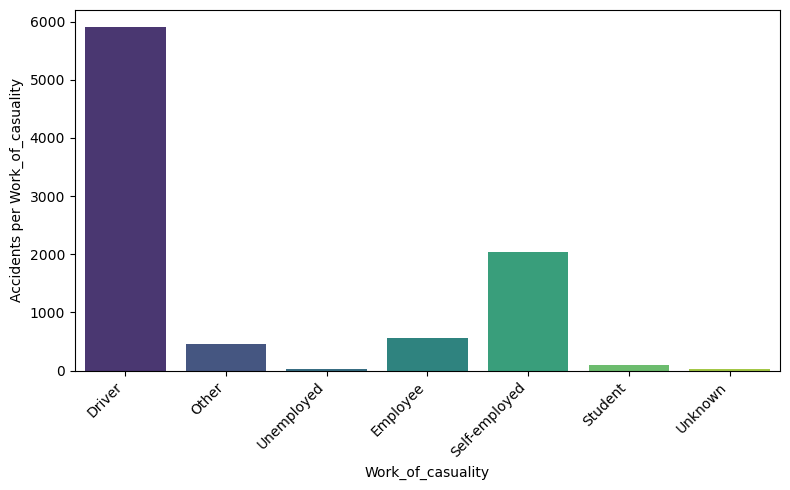

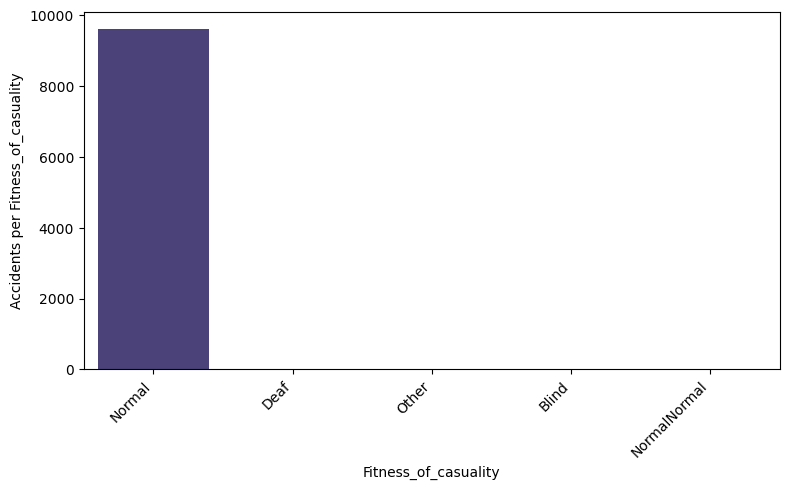

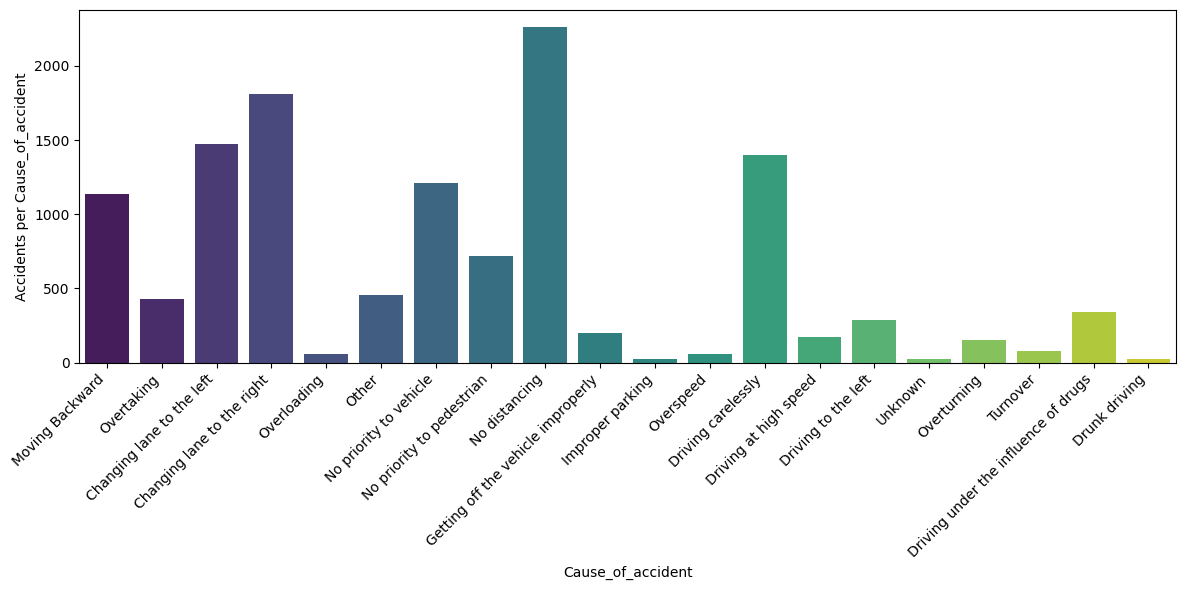

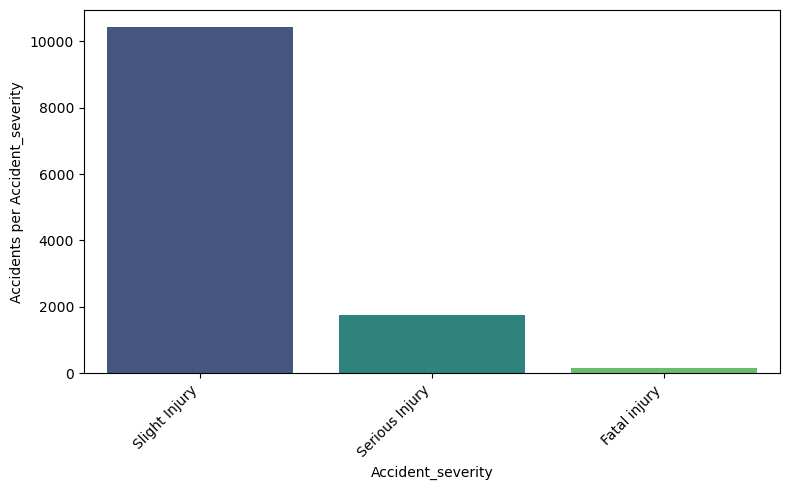

In [3]:
categorical_columns = [
    'Day_of_week','Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
    'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle',
    'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
    'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
    'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
    'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
    'Work_of_casuality', 'Fitness_of_casuality', 'Cause_of_accident',
    'Accident_severity'
]
for column in categorical_columns:
    num_categories = road[column].nunique() 
    plt.figure(figsize=(8, 5) if num_categories <= 10 else (12, 6))  # Ajusta o tamanho da figura
    sns.countplot(x=column, data=road,hue=column, palette="viridis", legend=False)
    plt.ylabel(f'Accidents per {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [4]:
#grupar a categoria vehicle_type por variaveis coerentes
category_mapping = {
    'Automobile': 'Car',
    'Public (> 45 seats)': 'Public Transport',
    'Public (13?45 seats)': 'Public Transport',
    'Public (12 seats)': 'Public Transport',
    'Lorry (41?100Q)': 'Truck',
    'Lorry (11?40Q)': 'Truck',
    'Long lorry': 'Truck',
    'Taxi': 'Public Transport',
    'Pick up upto 10Q': 'Truck',
    'Stationwagen': 'Car',
    'Ridden horse': 'Others',
    'Other': 'Others',
    'Bajaj': 'Motorcycle',
    'Turbo': 'Car',
    'Motorcycle': 'Motorcycle',
    'Special vehicle': 'Others',
    'Bicycle': 'Bicycle'
}

# Passo 3: Definindo uma função para categorizar
def categorize_vehicle_type(vehicle_type):
    """Categorização dos tipos de veículos com base no dicionário de mapeamento."""
    return category_mapping.get(vehicle_type, 'Unknown')  # Retorna 'Unknown' se não encontrar o valor

# Passo 4: Aplicando a função ao DataFrame
road['Vehicle_Category'] = road['Type_of_vehicle'].apply(categorize_vehicle_type)



Text(0.5, 1.0, 'Accident by type of Vehicle')

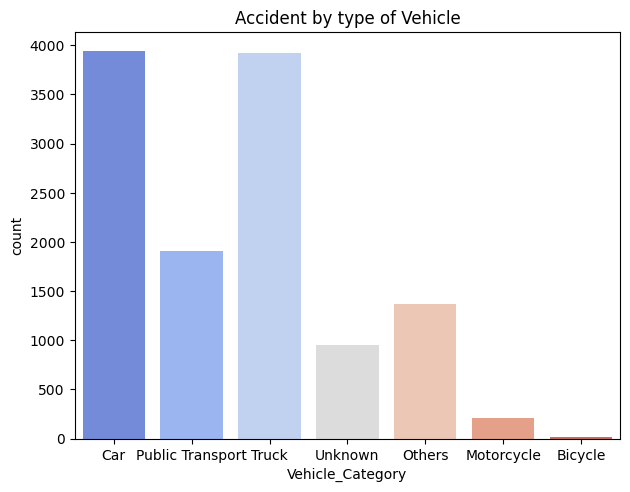

In [5]:
sns.countplot(x='Vehicle_Category', hue='Vehicle_Category', data=road, palette='coolwarm')
plt.figsize=(14,12)
plt.tight_layout() 
plt.title("Accident by type of Vehicle")


Text(0.5, 1.0, 'Accident by type of Vehicle')

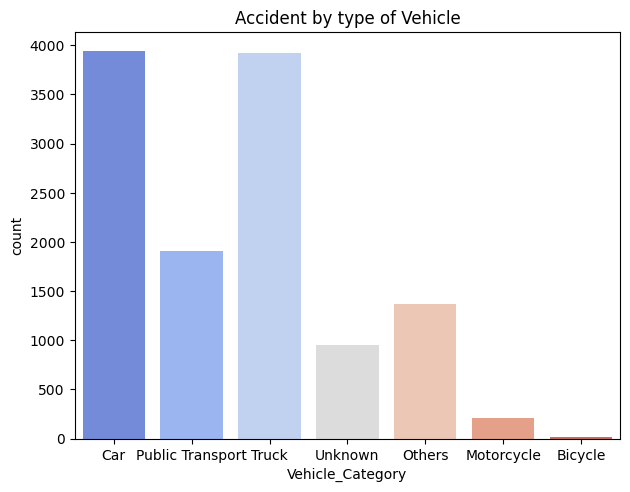

In [5]:
sns.countplot(x='Vehicle_Category', hue='Vehicle_Category', data=road, palette='coolwarm')
plt.figsize=(14,12)
plt.tight_layout() 
plt.title("Accident by type of Vehicle")


In [7]:
#apaga a coluna original que continha os varios tipos de veiculos e road allignamnet que tinha uma variavel com uma frequencia muito alta superior a 90%
columns_to_drop = ['Defect_of_vehicle', 'Fitness_of_casuality', 'Pedestrian_movement', 'Type_of_vehicle', 'Road_allignment']
existing_columns_to_drop = [col for col in columns_to_drop if col in road.columns]
if existing_columns_to_drop:
    road = road.drop(columns=existing_columns_to_drop)
    print("Colunas removidas:", existing_columns_to_drop)
else:
    print("Nenhuma coluna encontrada para remover.")


Nenhuma coluna encontrada para remover.


Converted Time Values:
 0       1900-01-01 17:02:00
1       1900-01-01 17:02:00
2       1900-01-01 17:02:00
3       1900-01-01 01:06:00
4       1900-01-01 01:06:00
                ...        
12311   1900-01-01 16:15:00
12312   1900-01-01 18:00:00
12313   1900-01-01 13:55:00
12314   1900-01-01 13:55:00
12315   1900-01-01 13:55:00
Name: Time, Length: 12316, dtype: datetime64[ns]
DataFrame with Categorized Time:
                      Time Day_of_week Age_band_of_driver Sex_of_driver  \
0     1900-01-01 17:02:00      Monday              18-30          Male   
1     1900-01-01 17:02:00      Monday              31-50          Male   
2     1900-01-01 17:02:00      Monday              18-30          Male   
3     1900-01-01 01:06:00      Sunday              18-30          Male   
4     1900-01-01 01:06:00      Sunday              18-30          Male   
...                   ...         ...                ...           ...   
12311 1900-01-01 16:15:00   Wednesday              31-50          M

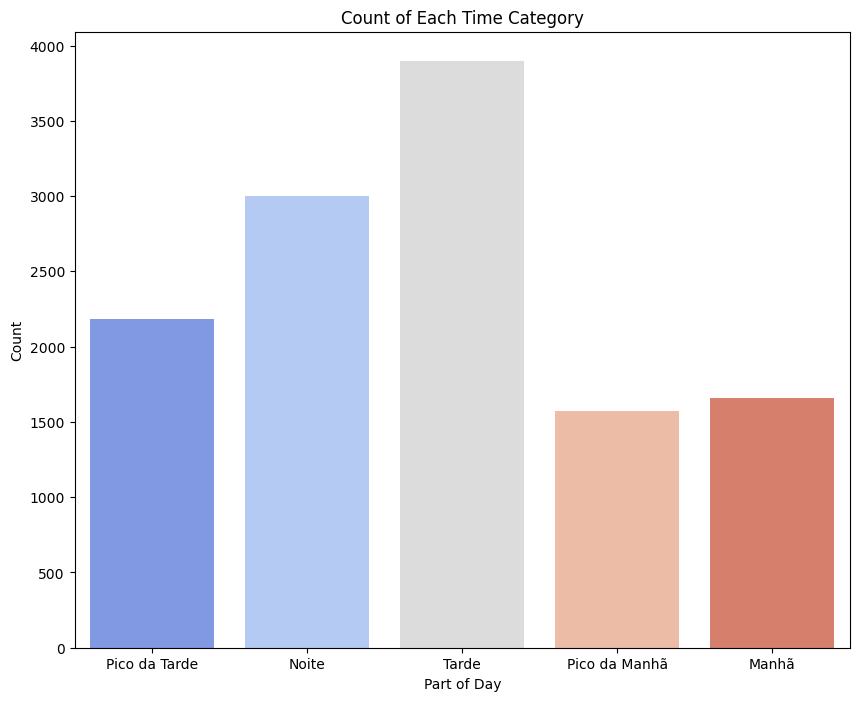

In [9]:
road['Time'] = pd.to_datetime(road['Time'], format='%H:%M:%S', errors='coerce')


# Define the function to categorize times
def categorize_time(time):
    if time.hour >= 6 and time.hour < 9:
        return 'Pico da Manhã'
    elif time.hour >= 9 and time.hour < 12:
        return 'Manhã'
    elif time.hour >= 12 and time.hour < 17:
        return 'Tarde'
    elif time.hour >= 17 and time.hour < 19:
        return 'Pico da Tarde'
    else:
        return 'Noite'

# Apply the function to create a new column 'Part_of_day'
road['Part_of_day'] = road['Time'].apply(categorize_time)

# Setting the figure size
plt.figure(figsize=(10, 8))
# Create the count plot
sns.countplot(x='Part_of_day', hue='Part_of_day', data=road, palette='coolwarm')
# Display the plot
plt.title('Accidents per time of the day')
plt.xlabel('Part of Day')
plt.ylabel('Count')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            11575 non-null  object        
 5   Vehicle_driver_relation      11737 non-null  object        
 6   Driving_experience           11487 non-null  object        
 7   Type_of_vehicle              11366 non-null  object        
 8   Owner_of_vehicle             11834 non-null  object        
 9   Service_year_of_vehicle      8388 non-null   object        
 10  Area_accident_occured        12077 non-null  object        
 11  Lanes_or_Medians             11931 non-nu

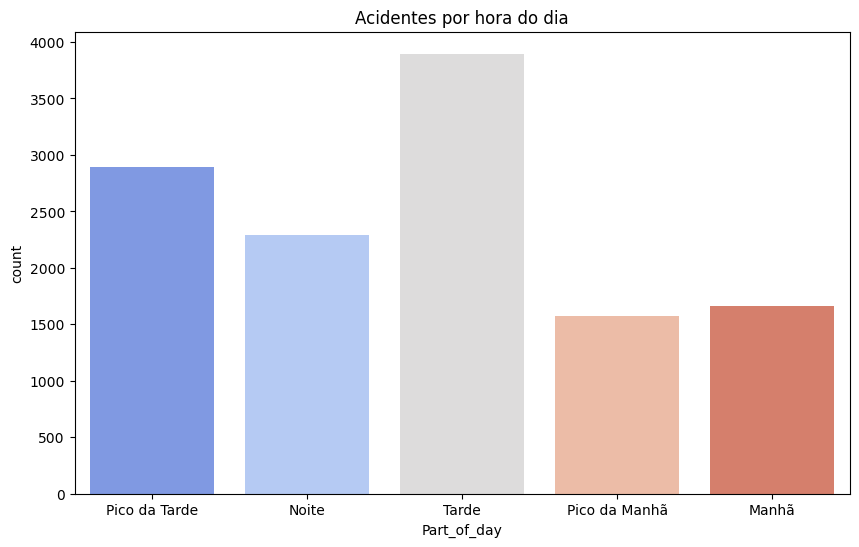

In [17]:
def categorize_time(time):
    """Classifica um horário em períodos do dia com base na hora."""
    if time.hour < 6:
        return 'Madrugada'
    elif time.hour < 12:
        return 'Manhã'
    elif time.hour < 18:
        return 'Tarde'
    elif time.hour < 21:
        return 'Início da Noite'
    else:
        return 'Noite'

road['Periodo_do_dia'] = road['Time'].apply(categorize_time)

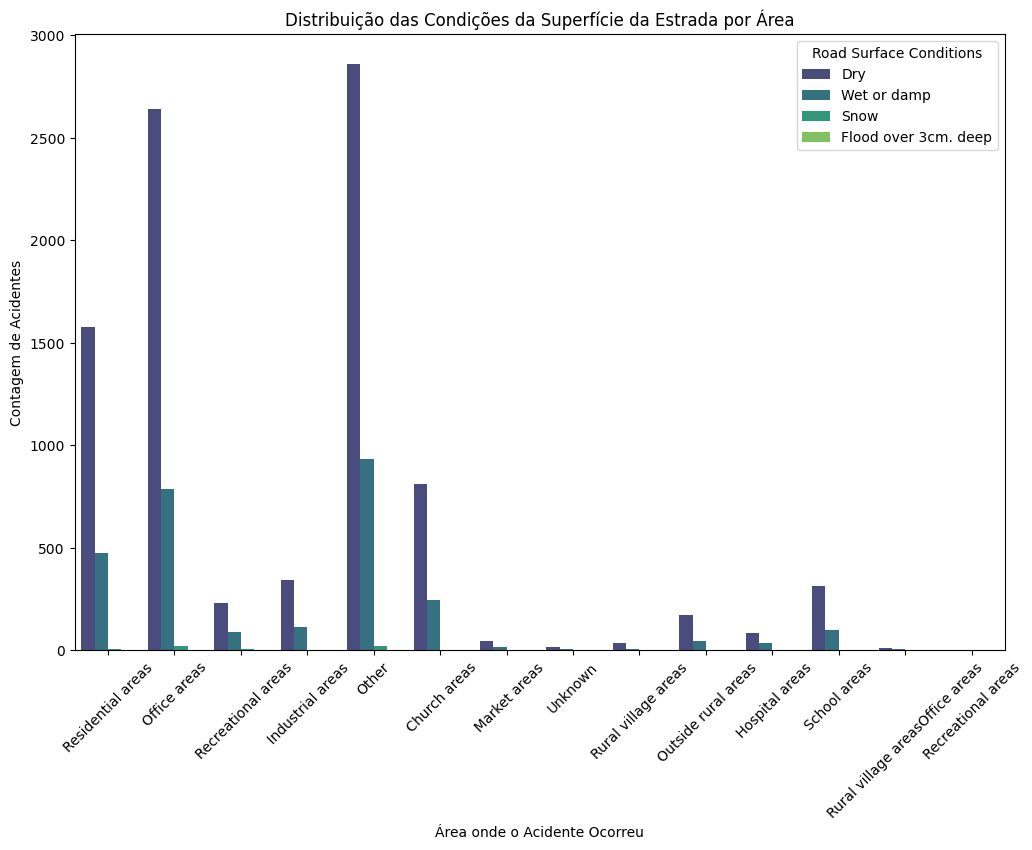

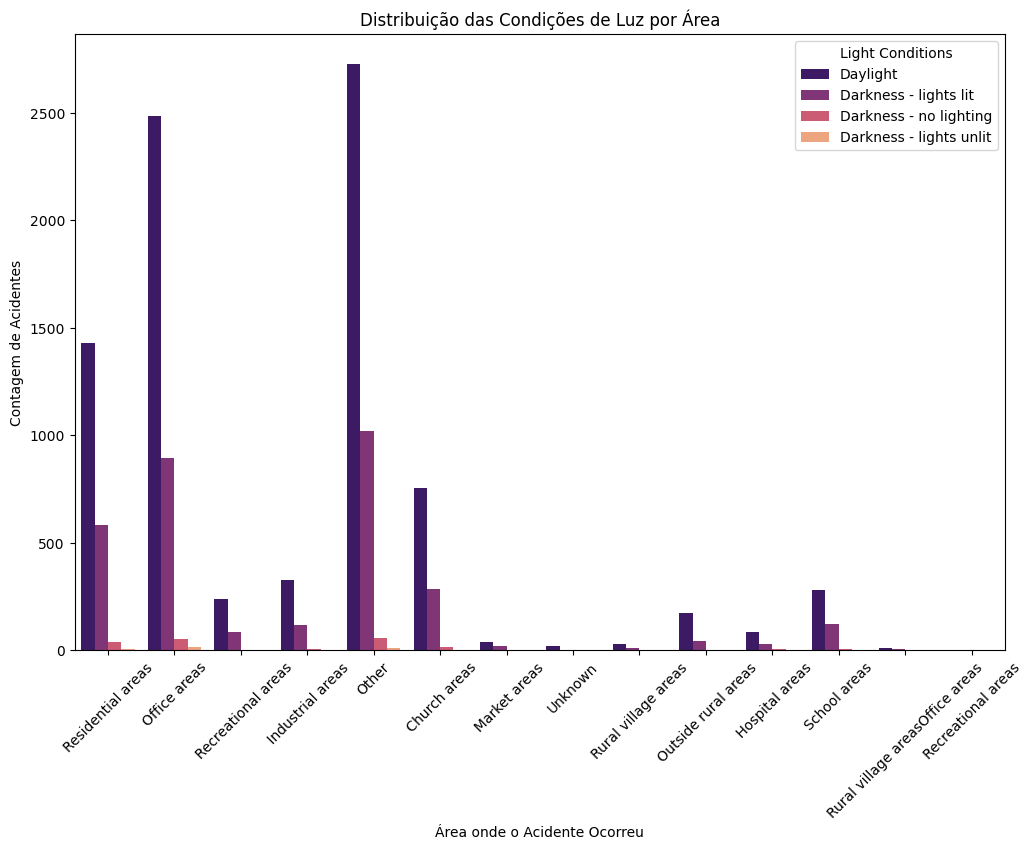

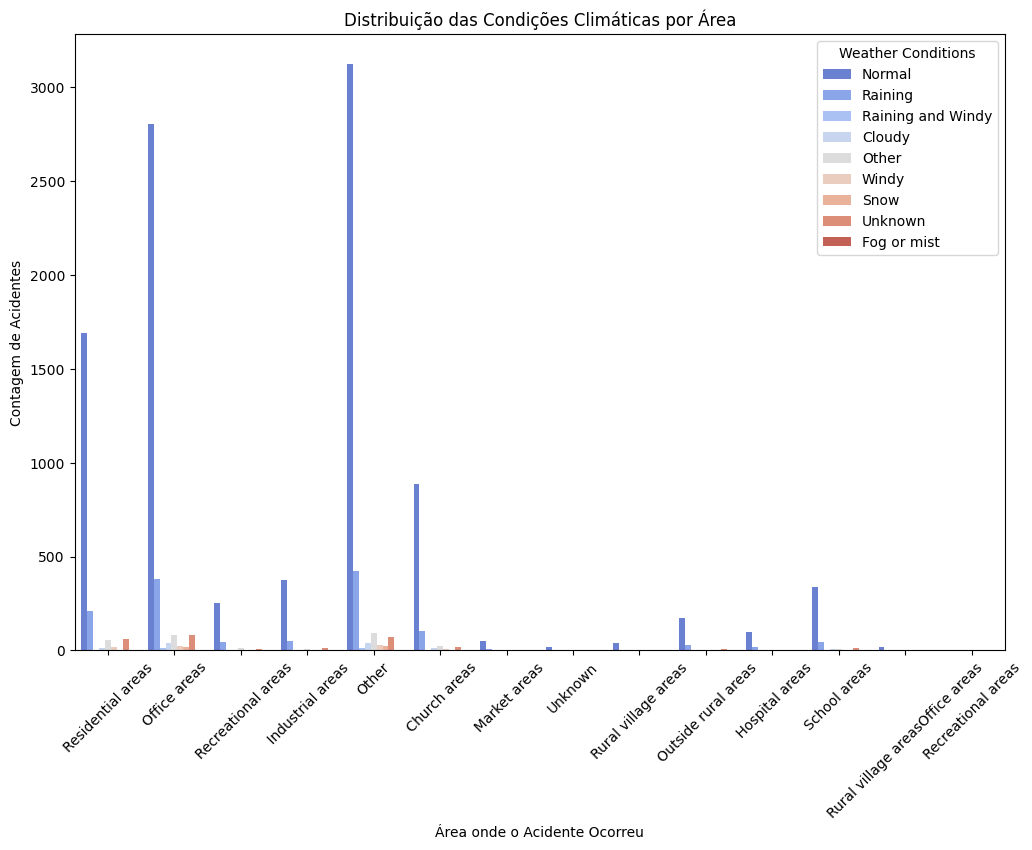

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
sns.countplot(x='Area_accident_occured', hue='Road_surface_conditions', data=road, palette='viridis')
plt.title('Distribuição das Condições da Superfície da Estrada por Área')
plt.xlabel('Área onde o Acidente Ocorreu')
plt.ylabel('Contagem de Acidentes')
plt.xticks(rotation=45)
plt.legend(title='Road Surface Conditions')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='Area_accident_occured', hue='Light_conditions', data=road, palette='magma')
plt.title('Distribuição das Condições de Luz por Área')
plt.xlabel('Área onde o Acidente Ocorreu')
plt.ylabel('Contagem de Acidentes')
plt.xticks(rotation=45)
plt.legend(title='Light Conditions')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='Area_accident_occured', hue='Weather_conditions', data=road, palette='coolwarm')
plt.title('Distribuição das Condições Climáticas por Área')
plt.xlabel('Área onde o Acidente Ocorreu')
plt.ylabel('Contagem de Acidentes')
plt.xticks(rotation=45)
plt.legend(title='Weather Conditions')
plt.show()

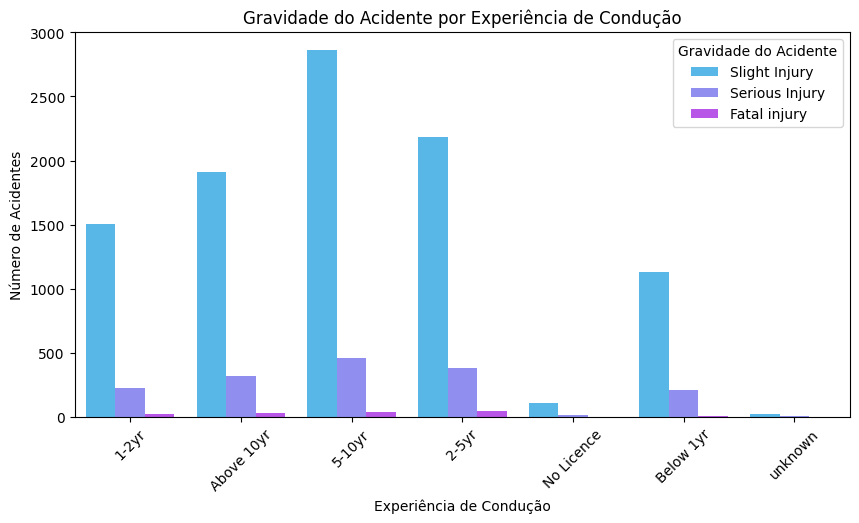

In [43]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Driving_experience', hue='Accident_severity', data=road, palette='cool')
plt.title('Gravidade do Acidente por Experiência de Condução')
plt.xlabel('Experiência de Condução')
plt.ylabel('Número de Acidentes')
plt.legend(title='Gravidade do Acidente')
plt.xticks(rotation=45)
plt.show()

Colunas removidas: ['Defect_of_vehicle', 'Fitness_of_casuality', 'Pedestrian_movement', 'Type_of_vehicle', 'Road_allignment']


In [48]:
road.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Cause_of_accident', 'Accident_severity',
       'Part_of_day', 'Vehicle_Category'],
      dtype='object')